# Pandas

**pandas** — программная библиотека на языке Python для обработки и анализа данных.

Установка и импорт библиотеки pandas в Jupyter Notebook:

In [ ]:
#!pip install pandas

In [4]:
import pandas as pd



**Датафрейм (DataFrame)** — двумерная структура данных, матрица, содержащая метки для строк и столбцов.


### Создание датафрейма

1. Из матрицы


In [ ]:
data = [['Tomsk', 70],
        ['Omsk', 55]]

In [ ]:
df = pd.DataFrame(data, columns=['city', 'code']) #в параметре columns перечисляем названия столбцов
df

,city,code
0,Tomsk,70
1,Omsk,55


2. Из списка словарей

In [ ]:
data = [{'city': 'Tomsk', 'code': 70},
        {'city': 'Omsk', 'code': 55}]

In [ ]:
df = pd.DataFrame(data)
df

,city,code
0,Tomsk,70
1,Omsk,55


Тип полученного объекта — датафрейм:

In [ ]:
type(df)

pandas.core.frame.DataFrame

Каждый столбец датафрейма — это объект типа Series.

**Series** — маркированная одномерная структура данных, представленная в виде таблицы с одной строкой. К элементам Series можно обращаться по специальным меткам, которыми могут быть не только числа, но любые произвольные имена.


In [ ]:
df['city']

0    Tomsk
1     Omsk
Name: city, dtype: object

In [ ]:
type(df['city'])

pandas.core.series.Series

Создание объекта типа Series:

In [ ]:
pd.Series(['Tomsk', 'Omsk'], name='city')

0    Tomsk
1     Omsk
Name: city, dtype: object

3. Создание датафрейма из Series:

In [ ]:
pd.DataFrame(pd.Series(['Tomsk', 'Omsk'], name='city'))

,city
0,Tomsk
1,Omsk


In [ ]:
df = pd.DataFrame({'city': pd.Series(['Tomsk', 'Omsk']),
                  'code': pd.Series([70, 55])})

In [ ]:
df

,city,code
0,Tomsk,70
1,Omsk,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    2 non-null      object
 1   code    2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [13]:
data = {'city': ['Tomsk', 'Omsk'],
        'code': [70, 55]}

In [14]:
df = pd.DataFrame(data)
df

,city,code
0,Tomsk,70
1,Omsk,55


In [15]:
# получаем доступ к гугл-диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
# вывести текущую директорию
print("Текущая деректория:", os.getcwd())

Текущая деректория: /content


In [17]:
# изменение текущего каталога на 'folder'
os.chdir("/content/drive/MyDrive/SkillBox/Python")

In [18]:
# вывести текущую директорию
print("Текущая деректория:", os.getcwd())

Текущая деректория: /content/drive/MyDrive/SkillBox/Python


In [65]:
# функция обрабатывает текстовый файл:
# - разбирает на токены и считает количество токенов в тексте
# - далее см. комментарии в теле функции
def dict_words_freq(file):
  # блок кода формирут список words_freq_list пар (частота : слово)
  with open("anna_words.txt") as file:
    words = [word.strip() for word in file.readlines()]
  words_set = set(words) # множество уникальных слов (токенов)
  words_freq_list = sorted([(words.count(word),word)  for word in words_set], reverse = True)

  # блок кода строит словарь words_freq_dict слов с одинаковой частотой
  words_freq_dict = {}
  for freq,word in words_freq_list:
    if freq in words_freq_dict.keys():
      words_freq_dict[freq].append(word)
    else:
      words_freq_dict[freq] = [word]
  return words_freq_list, words_freq_dict

In [66]:
path = '/content/drive/MyDrive/SkillBox/Python'
file = 'anna_words.txt'
words_freq_list = dict_words_freq(path+file)[0]

In [67]:
df = pd.DataFrame(words_freq_list, columns = ['freq','word'])
df

,freq,word
0,40,аня
1,28,свой
2,19,говорить
3,17,это
4,17,сказать
...,...,...
1193,1,200
1194,1,2
1195,1,18
1196,1,100


In [83]:
df['freq'].value_counts()

1     803
2     191
3      95
4      37
6      19
5      15
7       7
8       6
17      5
10      4
11      4
16      3
14      2
15      2
9       1
28      1
13      1
19      1
40      1
Name: freq, dtype: int64

In [84]:
df_val_counts = pd.DataFrame(df['freq'].value_counts(), columns = ['freq'])
print(df_val_counts)

    freq
1    803
2    191
3     95
4     37
6     19
5     15
7      7
8      6
17     5
10     4
11     4
16     3
14     2
15     2
9      1
28     1
13     1
19     1
40     1


<Axes: title={'center': 'Распределение частот слов'}, xlabel='Частоты слов'>

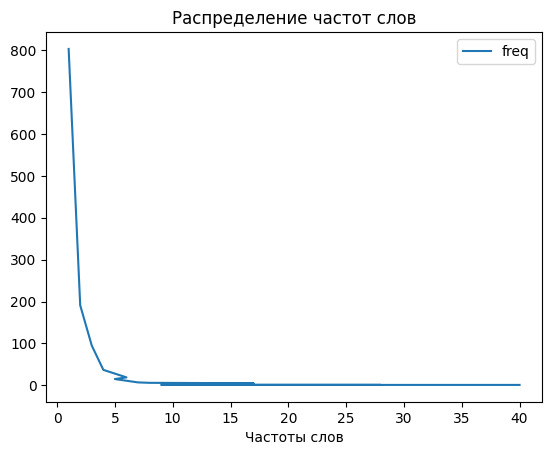

In [86]:
df_val_counts.plot(title = 'Распределение частот слов', xlabel = 'Частоты слов')